<a href="https://colab.research.google.com/github/JulioCezar1111/Projeto18/blob/main/Arvore_de_decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importar Biblioteca**

In [53]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz # Para arvore de decisão
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from IPython.display import Image

# **Download do Dataset**

In [62]:
!pip3 install wget
!wget https://raw.githubusercontent.com/diogocortiz/Curso-IA-para-todos/master/ArvoreDecis%C3%A3o/dataset_einstein.csv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-06-05 23:07:51--  https://raw.githubusercontent.com/diogocortiz/Curso-IA-para-todos/master/ArvoreDecis%C3%A3o/dataset_einstein.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248868 (243K) [text/plain]
Saving to: ‘dataset_einstein.csv.1’

dataset_einstein.cs 100%[===================>] 243.04K  --.-KB/s    in 0.03s   

2022-06-05 23:07:51 (9.19 MB/s) - ‘dataset_einstein.csv.1’ saved [248868/248868]



# **Carregar o dataset para dataframe(pandas)**

In [63]:
df = pd.read_csv('/content/dataset_einstein.csv', delimiter = ';')
display(df.head())

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient addmited to regular ward (1=yes. 0=no),Patient addmited to semi-intensive unit (1=yes. 0=no),Patient addmited to intensive care unit (1=yes. 0=no),Hemoglobin,Leukocytes,Basophils,Proteina C reativa mg/dL,Creatinine
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,-0.02234,-0.09461,-0.223767,-0.147895,2.089928
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN


# **Descrição do Dataframe**

In [64]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Patient ID                                             5644 non-null   object 
 1   Patient age quantile                                   5644 non-null   int64  
 2   SARS-Cov-2 exam result                                 5644 non-null   object 
 3   Patient addmited to regular ward (1=yes. 0=no)         5644 non-null   int64  
 4   Patient addmited to semi-intensive unit (1=yes. 0=no)  5644 non-null   int64  
 5   Patient addmited to intensive care unit (1=yes. 0=no)  5644 non-null   int64  
 6   Hemoglobin                                             603 non-null    float64
 7   Leukocytes                                             602 non-null    float64
 8   Basophils                                       

None

# **Tratar o dataframe**

In [65]:
df = df.dropna() # apaga a linha que tiver pelos menos 1 valor nulo
df = df.drop('Patient ID', axis = 1)
df = df.drop('Patient addmited to regular ward (1=yes. 0=no)', axis = 1)
df = df.drop('Patient addmited to semi-intensive unit (1=yes. 0=no)', axis = 1)
df = df.drop('Patient addmited to intensive care unit (1=yes. 0=no)', axis = 1)
display(df.head())

,Patient age quantile,SARS-Cov-2 exam result,Hemoglobin,Leukocytes,Basophils,Proteina C reativa mg/dL,Creatinine
1,17,negative,-0.022340,-0.094610,-0.223767,-0.147895,2.089928
8,1,negative,-0.774212,0.364550,-0.223767,-0.286986,-1.838623
28,13,negative,0.854844,-0.075131,2.525365,-0.434025,-0.701411
29,14,negative,0.854844,0.105751,-0.529226,-0.529401,0.332418
30,9,negative,-0.711556,-0.286623,-0.223767,0.545572,1.021638


# **Analisar o dataframe**

In [66]:
# Saber quantidade que deu positivo ou negativo ao SARS-Cov-2
qntd_categoria = df['SARS-Cov-2 exam result'].value_counts()
print(qntd_categoria)

negative    302
positive     55
Name: SARS-Cov-2 exam result, dtype: int64


# **Definir features e etiqueta**

Necessario transformar o dataframe para array numpy, que sera o tipo de dado que sera usado no treinamento

In [67]:
# y sera etiqueta
y = df['SARS-Cov-2 exam result'].values # converte para array
display(y)

# x sera a matriz com as features
x = df[['Hemoglobin', 'Leukocytes', 'Basophils', 'Proteina C reativa mg/dL']].values
display(x)

array(['negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negati

array([[-0.02234027, -0.09461035, -0.22376651, -0.14789495],
       [-0.774212  ,  0.36455047, -0.22376651, -0.28698576],
       [ 0.85484386, -0.07513076,  2.52536511, -0.4340246 ],
       ...,
       [ 1.10546756, -0.5509882 , -0.22376651,  0.5614683 ],
       [-2.77920342, -1.73367476, -1.14014375,  0.60915661],
       [ 0.54156393, -1.28842807, -1.14014375, -0.50357002]])

# **Dividir o Dataframe para treino e teste**

In [68]:
x_train_df, x_test_df, y_train_df, y_test_df = train_test_split(x, y, test_size = 0.2, random_state = 3)

# **Treinar o modelo**

tree.DecisionTreeClassifier('O criterio', 'tamanho maximo da arvore')

In [69]:
from sklearn import tree
# Criar um algortimo que sera do tipo arvore de decisão

algortimo_arvore = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5) # Criar a  arvore de decisao

# Treinar o modelo
modelo = algortimo_arvore.fit(x_train_df, y_train_df)

# **Visualização da arvore de decisão**

A arvore de decisão pode ser considerada um modelo white box, ou seja, um modelo que podemos entender melhor o que ele aprendeu e como ele decide. Podemos mostrar a arvore para isso 

[0.13553694 0.52890209 0.18040441 0.15515656]


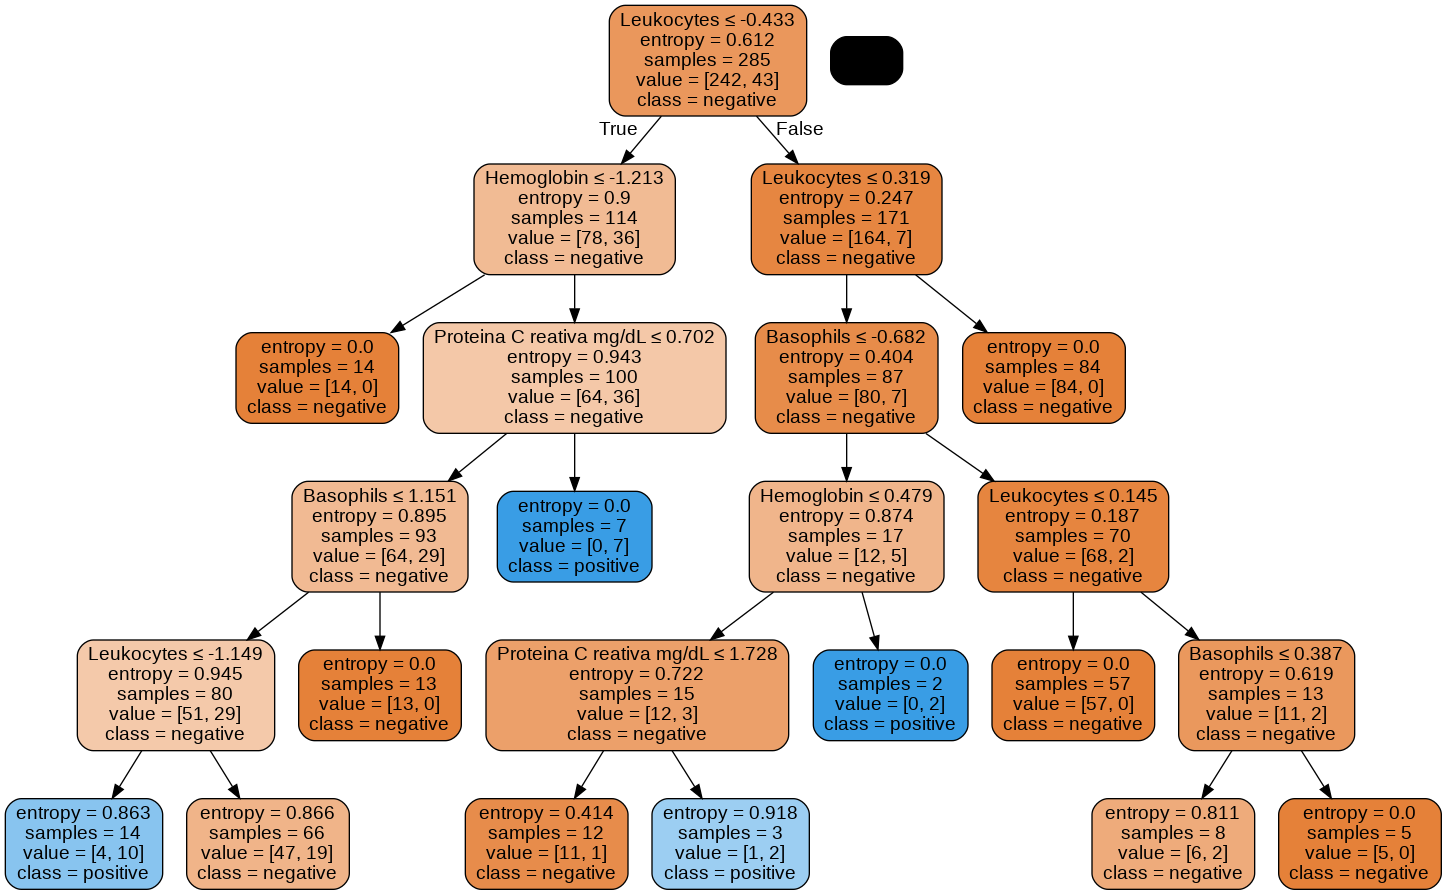

In [70]:
nome_features = ['Hemoglobin', 'Leukocytes', 'Basophils', 'Proteina C reativa mg/dL']
nome_classes = modelo.classes_

# Imagem da arvore
dot_data = StringIO()

# dot_data = tree.export_graphviz(my_tree_one, out_file = None, feature_names = featureNames)
export_graphviz(modelo, out_file = dot_data, filled = True, feature_names = nome_features, class_names = nome_classes, rounded = True, special_characters = True)
grafico = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(grafico.create_png())
grafico.write_png('arvore.png')
Image('arvore.png')

# **Features mais importante para o modelo**

Feature ranking
feature 1, 1, 0.5289020935715528
feature 2, 2, 0.18040441355283326
feature 3, 3, 0.15515655722475177
feature 4, 0, 0.1355369356508621


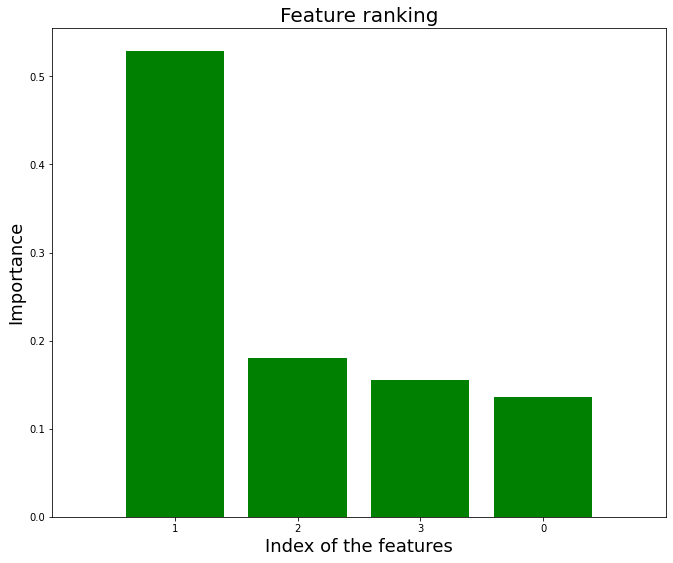

In [79]:
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]
print('Feature ranking')

for f in range(x.shape[1]):
  print(f'feature {f + 1}, {indices[f]}, {importances[indices[f]]}')
  
f, ax = plt.subplots(figsize = (11, 9))
plt.title('Feature ranking', fontsize = 20)
plt.bar(range(x.shape[1]), importances[indices], color = 'g', align = 'center')
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.ylabel('Importance', fontsize = 18)
plt.xlabel('Index of the features', fontsize = 18)
plt.show()

#   Indice das features
''' 0 - Hemoglobin
    1 - Leukocytes
    2 - Basophils
    3 - Proteina C reativa mg/dL '''

# **Testar modelo**

In [82]:
# Aplicando o modelo na base de dados de teste
y_predicoes_df = modelo.predict(x_test_df)

#Avaliação do modelo
#Vamos avaliar o valor real do dataset y_test_df com as predições
print('Acurácia da arvore: ', accuracy_score(y_test_df, y_predicoes_df).round(2))
print(classification_report(y_test_df, y_predicoes_df))

# precision: das classificações que o modelo fez para uma determinada classe, quantas efetivamente eram correta
# recall: Dos possiveis datapoints pertecentes a uma determinada classe, quantos o modelo conseguiu classificar corretamente

Acurácia da arvore:  0.85
              precision    recall  f1-score   support

    negative       0.87      0.97      0.91        60
    positive       0.60      0.25      0.35        12

    accuracy                           0.85        72
   macro avg       0.73      0.61      0.63        72
weighted avg       0.82      0.85      0.82        72



# **Matriz de confusão**

Matriz de Confusão sem normalizacão 
[[58  2]
 [ 9  3]]


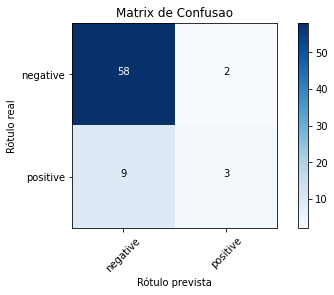

In [84]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Matriz de Confusão sem normalizacão ')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Rótulo real')
    plt.xlabel('Rótulo prevista')

matrix_confusao = confusion_matrix(y_test_df, y_predicoes_df)
plt.figure()
plot_confusion_matrix(matrix_confusao, classes=nome_classes,
                      title='Matrix de Confusao')